# Set Up
File: clutchness_01.py  
Date Created: 2018-11-28  
Author(s): Mahkah Wu  
Purpose: Build win probabilities modles and visual analytics tools

In [33]:
### Set Up
import psycopg2
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
import datetime
import numpy as np
import datetime
import pickle 
import math

# Import database credentials from file ignored by GitHub and set up connection
from ignore import db_cred
conn = db_cred.connect_db()

# Load Data


In [34]:
df_event = pd.read_csv('ignore\large_data\event_table.csv')
df_game = pd.read_csv('ignore\large_data\game_table.csv')

C:\Users\Mahkah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
df_event.head()

,game_id,event_id,batting_team,fielding_team,inning,bottom,home_batting,batter_id,pitcher_id,s_home_runs,...,fielder2_id,fielder3_id,fielder4_id,fielder5_id,fielder6_id,fielder7_id,fielder8_id,fielder9_id,fielder_id,year
0,BOS195004180,1,NYA,BOS,1,0,0,rizzuph01,parneme01,0,...,battsma01,goodmbi01,doerrbo01,peskyjo01,stephve01,willite01,dimagdo01,zarilal01,yawketo99,1950
1,BOS195004180,2,NYA,BOS,1,0,0,henrito01,parneme01,0,...,battsma01,goodmbi01,doerrbo01,peskyjo01,stephve01,willite01,dimagdo01,zarilal01,willite01,1950
2,BOS195004180,3,NYA,BOS,1,0,0,bauerha01,parneme01,0,...,battsma01,goodmbi01,doerrbo01,peskyjo01,stephve01,willite01,dimagdo01,zarilal01,stephve01,1950
3,BOS195004180,4,BOS,NYA,1,1,1,dimagdo01,reynoal01,0,...,berrayo01,henrito01,colemje01,johnsbi03,rizzuph01,lindejo01,dimagjo01,bauerha01,dimagjo01,1950
4,BOS195004180,5,BOS,NYA,1,1,1,peskyjo01,reynoal01,0,...,berrayo01,henrito01,colemje01,johnsbi03,rizzuph01,lindejo01,dimagjo01,bauerha01,lindejo01,1950


In [36]:
df_event = df_event.loc[df_event['end_game_flag']==0]

In [37]:
develop = False
df_event_ = df_event.groupby('game_id', group_keys=False).apply(lambda df: df.sample(1))
if True:
    df_event_ = df_event_.sample(50001)



In [38]:
df = pd.merge(df_event_, df_game, how='left', left_on='game_id', right_on='game_id')

In [39]:
print(df.shape)
df.head()

(50001, 67)


,game_id,event_id,batting_team,fielding_team,inning,bottom,home_batting,batter_id,pitcher_id,s_home_runs,...,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,franchise1,franchise2
0,PIT195908170,64,CHN,PIT,8,0,0,thomsbo01,greenfr01,7,...,11.507635,6.885018,0.528428,0.471572,1495.498,1504.077,7,6,PIT,CHC
1,DET196407110,23,DET,BOS,3,1,1,woodja01,earlear01,1,...,6.058018,14.151386,0.566729,0.433271,1510.610,1474.090,8,1,DET,BOS
2,SLN195707270,36,PIT,SLN,4,0,0,groatdi01,dicksmu01,1,...,-0.482410,11.507635,0.616865,0.383135,1522.929,1457.270,2,4,STL,PIT
3,PHI195307080,13,PHI,BRO,2,1,1,ennisde01,loesbi01,0,...,5.983037,7.232180,0.491508,0.508492,1526.923,1558.032,4,8,PHI,LAD
4,NYN199206170,61,MON,NYN,8,0,0,cartega01,gibsopa01,1,...,12.937429,12.579068,0.542037,0.457963,1494.223,1494.318,2,5,NYM,WSN


In [40]:
list(df)

['game_id',
 'event_id',
 'batting_team',
 'fielding_team',
 'inning',
 'bottom',
 'home_batting',
 'batter_id',
 'pitcher_id',
 's_home_runs',
 's_away_runs',
 's_batting_runs',
 's_fielding_runs',
 's_outs',
 's_base1',
 's_base2',
 's_base3',
 'f_batting_runs',
 'f_fielding_runs',
 'f_home_runs',
 'f_away_runs',
 'f_outs',
 'f_base1',
 'f_base2',
 'f_base3',
 'end_game_flag',
 'event_str',
 'fielder2_id',
 'fielder3_id',
 'fielder4_id',
 'fielder5_id',
 'fielder6_id',
 'fielder7_id',
 'fielder8_id',
 'fielder9_id',
 'fielder_id',
 'year',
 'top_bat_team',
 'bot_bat_team',
 'date',
 'season',
 'neutral',
 'playoff',
 'team1',
 'team2',
 'elo1_pre',
 'elo2_pre',
 'elo_prob1',
 'elo_prob2',
 'elo1_post',
 'elo2_post',
 'rating1_pre',
 'rating2_pre',
 'pitcher1',
 'pitcher2',
 'pitcher1_rgs',
 'pitcher2_rgs',
 'pitcher1_adj',
 'pitcher2_adj',
 'rating_prob1',
 'rating_prob2',
 'rating1_post',
 'rating2_post',
 'score1',
 'score2',
 'franchise1',
 'franchise2']

# Feature Engineering

Let's set up our dataframe such that we are always trying to predict the win probability of the team that's currently batting.

In [41]:
df['home_team_won'] = 0
df['home_team_won'].loc[df['score1'] > df['score2']] = 1
df[['score1', 'score2', 'home_team_won']].sample(10)

C:\Users\Mahkah\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,score1,score2,home_team_won
32616,4,2,1
7690,2,2,0
10107,8,4,1
42997,4,3,1
880,3,8,0
1867,9,3,1
23673,13,5,1
15661,8,9,0
43444,5,2,1
47136,8,2,1


In [42]:
df[(df['batting_team']!=df['team1']) &  (df['batting_team']!=df['team2'])][['batting_team', 'team1', 'team2', 'franchise1', 'franchise2']].shape

(0, 5)

In [43]:
df['batting_team_won'] = df['home_team_won']
df['batting_team_won'].loc[df['batting_team'] == df['team2']] = (df['home_team_won'] + 1) % 2
df[['batting_team_won', 'batting_team', 'fielding_team', 'team1', 'team2', 'score1', 'score2']].sample(10)

C:\Users\Mahkah\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,batting_team_won,batting_team,fielding_team,team1,team2,score1,score2
20536,0,MON,PHI,MON,PHI,5,10
24257,0,CAL,MIN,CAL,MIN,4,5
49238,1,HOU,CIN,HOU,CIN,6,1
44387,1,MIL,CHN,CHN,MIL,3,4
37521,1,NYA,BOS,BOS,NYA,0,8
12779,0,CLE,FLO,CLE,FLO,1,4
21868,1,BAL,MIL,MIL,BAL,6,7
24921,1,CHN,SFN,CHN,SFN,6,5
47589,0,MIN,CLE,MIN,CLE,1,3
24793,0,SLN,MON,MON,SLN,10,3


Inning/Outs is a non-linear method of representing a linear quantity. Let's fix that. Also scale down to a typical game length (54 outs).

In [44]:
df['total_s_outs'] = ((df['inning']-1) * 6 + df['bottom'] * 3 + df['s_outs'])/54
df[['inning', 'bottom', 's_outs', 'total_s_outs']].sample(10)

,inning,bottom,s_outs,total_s_outs
30974,4,1,0,0.388889
45991,1,0,1,0.018519
3892,4,1,1,0.407407
42853,6,1,2,0.648148
37659,5,0,1,0.462963
1422,7,0,0,0.666667
4701,5,1,1,0.518519
49960,7,1,1,0.740741
21463,5,1,1,0.518519
10986,6,0,0,0.555556


In [45]:
# This is more complicated then how it's set up, don't use unless you fix.
df['potential_final_state'] = 0
df['potential_final_state'].loc[(df['bottom']==1) & (df['inning']>=9) & (df['s_outs']==2)] = 1
df[['inning', 'bottom', 's_outs', 'potential_final_state']].loc[df['potential_final_state']==1].sample(10)

C:\Users\Mahkah\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,inning,bottom,s_outs,potential_final_state
37391,9,1,2,1
34443,10,1,2,1
33704,9,1,2,1
6066,9,1,2,1
39606,9,1,2,1
43306,11,1,2,1
27506,10,1,2,1
28855,9,1,2,1
9731,13,1,2,1
34793,9,1,2,1


In [46]:
df['potential_final_inning'] = 0
df['potential_final_inning'].loc[df['inning']>=9] = 1
df[['inning', 'potential_final_inning']].sample(10)

C:\Users\Mahkah\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,inning,potential_final_inning
49748,5,0
30732,9,1
25339,4,0
17336,7,0
43814,5,0
32026,6,0
5853,1,0
48710,5,0
27842,1,0
46469,2,0


Elo rating is given by:

In [47]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
P(\Delta_{elo}) = \frac{1}{1 + 10^{\frac{\Delta_{elo}}{400}}} \\
\end{eqnarray}""")


<IPython.core.display.Latex object>

Actually just used implied win probability.

In [48]:
df['win_prob'] = df['elo_prob1']
df['win_prob'].loc[df['batting_team'] == df['team2']] = df['elo_prob2']
df[['win_prob', 'batting_team', 'fielding_team', 'team1', 'team2', 'elo_prob1', 'elo_prob2']].sample(10)

C:\Users\Mahkah\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,win_prob,batting_team,fielding_team,team1,team2,elo_prob1,elo_prob2
29534,0.520947,ARI,SFN,ARI,SFN,0.520947,0.479053
34544,0.536051,NYA,DET,DET,NYA,0.463949,0.536051
3427,0.348283,KCA,TBA,TBA,KCA,0.651717,0.348283
21558,0.625637,HOU,CIN,HOU,CIN,0.625637,0.374363
41464,0.557040,KC1,WS1,KC1,WS1,0.557040,0.442960
17929,0.407441,CLE,BAL,BAL,CLE,0.592559,0.407441
34062,0.461608,COL,CHN,CHN,COL,0.538392,0.461608
12189,0.665459,HOU,SDN,HOU,SDN,0.665459,0.334541
44480,0.578730,LAN,CHN,LAN,CHN,0.578730,0.421270
11377,0.530935,CHN,PIT,CHN,PIT,0.530935,0.469065


Year. We expect pretty significant variability between eras, so let's build some higher order polynomials. Let's map year to chebyshev polynomials because why not?

In [49]:
def chebyshev_scaler(col, name=None, n=2):
    '''Incomplete, don't use'''
    df = pd.DataFrame(data=col)
    if name==None:
        name = list(df)[0]
    df['{}_0'.format(name)] = 1
    df['{}_1'.format(name)] = (df[name] - df[name].min()) / (df[name].max() - df[name].min())
    for i in range(2, n+1):
        df['{}_{}'.format(name, i)] = 2 * df['{}_{}'.format(name, i-1)] * df['{}_{}'.format(name, i-1)] - df['{}_{}'.format(name, i-2)]
    df.set_index(name, inplace=True, drop=True)
    return df

In [50]:
df['year_0'] = 1
df['year_1'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['year_2'] = 2 * df['year_1'] * df['year_1'] - df['year_0']
df['year_3'] = 2 * df['year_1'] * df['year_2'] - df['year_1']
df['year_4'] = 2 * df['year_1'] * df['year_3'] - df['year_2']
df['year_5'] = 2 * df['year_1'] * df['year_4'] - df['year_3']

df[['year', 'year_0', 'year_1', 'year_2', 'year_3', 'year_4', 'year_5']].sample(10)


,year,year_0,year_1,year_2,year_3,year_4,year_5
17141,1992,1,0.636364,-0.190083,-0.878287,-0.927737,-0.302469
7718,2008,1,0.878788,0.544536,0.078276,-0.406960,-0.793540
9187,1961,1,0.166667,-0.944444,-0.481481,0.783951,0.742798
30790,2011,1,0.924242,0.708448,0.385313,0.003797,-0.378294
48270,1951,1,0.015152,-0.999541,-0.045441,0.998164,0.075688
11042,1955,1,0.075758,-0.988522,-0.225534,0.954350,0.370132
43468,1969,1,0.287879,-0.834252,-0.768205,0.391951,0.993875
9967,1993,1,0.651515,-0.151056,-0.848346,-0.954364,-0.395220
11162,2014,1,0.969697,0.880624,0.738181,0.550999,0.330423
35866,2014,1,0.969697,0.880624,0.738181,0.550999,0.330423


In [51]:
df['s_run_delta'] = df['s_batting_runs'] - df['s_fielding_runs']
df['s_run_delta_1'] = (df['s_run_delta'] - df['s_run_delta'].min()) / (df['s_run_delta'].max() - df['s_run_delta'].min())
df['s_run_delta_2'] = 2 * df['s_run_delta_1'] * df['s_run_delta_1'] - 1
df[['s_batting_runs', 's_fielding_runs', 's_run_delta', 's_run_delta_1', 's_run_delta_2']].sample(10)

,s_batting_runs,s_fielding_runs,s_run_delta,s_run_delta_1,s_run_delta_2
9640,0,3,-3,0.395833,-0.686632
43967,0,0,0,0.458333,-0.579861
27802,1,4,-3,0.395833,-0.686632
28509,0,1,-1,0.437500,-0.617188
40494,0,1,-1,0.437500,-0.617188
38464,1,0,1,0.479167,-0.540799
20768,0,4,-4,0.375000,-0.718750
44407,0,0,0,0.458333,-0.579861
47570,1,1,0,0.458333,-0.579861
8900,3,5,-2,0.416667,-0.652778


Intuitivly, we know that pre-game team strength decreases in importance as the game progresses. But how fast?

In [52]:
df['win_prob_vanishing_ln'] = df['win_prob']/(1 + np.log(df['total_s_outs'] + 1))
df['win_prob_vanishing_1'] = df['win_prob']/(1 + df['total_s_outs'])
df['win_prob_vanishing_2'] = df['win_prob'] / ((1 + df['total_s_outs']) ** 2)
df[['total_s_outs', 'win_prob', 'win_prob', 'win_prob_vanishing_ln', 'win_prob_vanishing_1', 'win_prob_vanishing_2']].sample(10)

,total_s_outs,win_prob,win_prob,win_prob_vanishing_ln,win_prob_vanishing_1,win_prob_vanishing_2
20365,0.074074,0.738724,0.738724,0.689456,0.687777,0.640345
19541,0.888889,0.369802,0.369802,0.226042,0.195778,0.103647
3133,0.537037,0.559923,0.559923,0.391594,0.364287,0.237006
40321,0.333333,0.638614,0.638614,0.495941,0.478961,0.359220
26390,0.185185,0.647180,0.647180,0.553193,0.546058,0.460737
5686,0.203704,0.546501,0.546501,0.461026,0.454016,0.377183
2274,0.296296,0.537304,0.537304,0.426598,0.414492,0.319751
13584,0.537037,0.473285,0.473285,0.331002,0.307921,0.200334
34421,0.648148,0.577442,0.577442,0.385051,0.350358,0.212577
2302,0.444444,0.372964,0.372964,0.272690,0.258206,0.178758


# Modeling
Our goal is to predict win probability. Winning is a binary state, so we'll utilize probabalistic binary classifiers (these are models with the method predict_proba). Specifically, we'll try logestic regression, naive Bayes, and SVM. Because we're trying to maximize our prediction of win probability, rather than wins, most of the built in model scoring (e.g. looking at precision/recall/f1) is not applicable. Instead, we'll bucket games according to their win probability scores and look at the aggregate win rate of those buckets. We're looking for models where the buckets' mean predicted rates match the aggregate win rate and that perform comperably across the domain.

One outstanding question: should we be taking a single event from each game, to ensure instances are independent, or can we use all states?

In [53]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import RadViz
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.manifold import Manifold
from yellowbrick.features.importances import FeatureImportances



But first, let's mess around with colors.

In [54]:
palette = sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

In [55]:
print(palette)

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737), (0.21568627450980393, 0.4941176470588236, 0.7215686274509804), (0.3019607843137256, 0.6862745098039216, 0.29019607843137263), (0.5960784313725492, 0.3058823529411765, 0.6392156862745098), (1.0, 0.4980392156862745, 0.0), (0.9999999999999998, 1.0, 0.19999999999999996), (0.6509803921568629, 0.33725490196078434, 0.1568627450980391), (0.9686274509803922, 0.5058823529411766, 0.7490196078431374), (0.6, 0.6, 0.6)]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


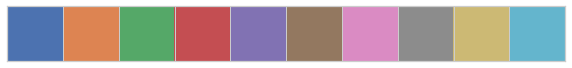

In [56]:
#colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
colors = sns.color_palette('deep')
sns.palplot(sns.color_palette(colors))
print(colors)

In [57]:
# class WinProbPredictor:
#     def __init__(self, model, X, y):
#         self.model = model
#         self.X = X
#         self.y = y

#     def tts(self):
#         pass


def predict_win_prob(model, X, y, test_size=0.2, seed=[None], cross_validation=12, validation_buckets=20, filename=None, ax=None):
    '''
    Predicts win probability and prints validation scatter plot. Optionally saves model parameters, validation, and model
    '''
    # Setup Function Parameters
    if seed==[None]:
        seed = np.random.randint(100000, size=12)
    
    # Crossvalidate Model
    validation = {}
    max_count = 0
    x_density = []
    brier_score = []
    df_validate = pd.DataFrame(index = range(0, validation_buckets))
    df_validate['bucket'] = df_validate.index
    for i in range(0, cross_validation):
        X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size, random_state=seed[i])

        model.fit(X_train, y_train)
        
        # Pickle
        if filename:
            with open('{}_{}.pickle'.format(filename, i), 'wb') as f:
                pickle.dump(model, f)
        
        #y_prob = model.predict_proba(X_test)
        y_hat = [item[1] for item in model.predict_proba(X_test)]
        brier_score.append(brier_score_loss(y_test, y_hat))
        df_predict = pd.DataFrame(data={'y_hat': y_hat, 'y_test': y_test})
        df_predict['valid_bucket'] = -1
        for b in range(0, validation_buckets):
            df_predict.loc[(df_predict['y_hat'] >= b/validation_buckets) & 
                           (df_predict['y_hat'] < (b+1)/validation_buckets), 
                           'valid_bucket'] = b
        x_density.append(df_predict['y_hat'])
        # Do we want to do buckets based on divisions of the domain or by percentile?
        # The former for now
        df_validate['average_y_hat_{}'.format(i)] = df_validate.index.to_series().apply(
            lambda x: df_predict.loc[df_predict['valid_bucket']==x, 'y_hat'].mean())
        df_validate['win_prob_{}'.format(i)] = df_validate.index.to_series().apply(
            lambda x: df_predict.loc[df_predict['valid_bucket']==x, 'y_test'].mean())
        df_validate['count_{}'.format(i)] = df_validate.index.to_series().apply(
            lambda x: df_predict.loc[df_predict['valid_bucket']==x, 'y_test'].count())
        if df_validate['count_{}'.format(i)].max() > max_count:
            max_count = df_validate['count_{}'.format(i)].max()
    
    
    
    # Set Up Plot
    # Find good colors
    fig = plt.figure(figsize=(14,9))
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 
    gs = GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
#     Figure out how to get this worning with the density plots
#     if ax is None:
#         _, ax = plt.subplots(figsize=(9,6))
    
    
    # Main Plot
    y_density = []
    y_density_weights = []
    for i in range(0, cross_validation):
        x = df_validate['average_y_hat_{}'.format(i)]
        y = df_validate['win_prob_{}'.format(i)] - df_validate['average_y_hat_{}'.format(i)]
        size = (13 * (df_validate['count_{}'.format(i)] / max_count)) ** 2 + 10
        label = 'TTS {}'.format(i+1)
        ax_main.scatter(x, y, s=size, label=label, alpha=0.8)
        
        
        y_density.append(y)
        y_density_weights.append(df_validate['count_{}'.format(i)])
        
    # Y Density Plot: y_hat - win probability 
    # Density/weight computed above
    ax_yDist.hist(y_density, weights=y_density_weights, bins=40, orientation='horizontal', stacked=True, align='mid', density=True)
    ax_yDist.set(xlabel='Residual distribution')
    
    
    # X Density Plot: y_hat
    ax_xDist.hist(x_density, bins=validation_buckets, stacked=True, align='mid', density=True)
    ax_xDist.set(ylabel='Predicted win\nprobability distribution')
    
    # Ref Line
    ax_main.axhline(0, c='k', ls='--', lw=1)
    
    # Best Fit Line
    df_validate_long = pd.melt(df_validate, id_vars='bucket', value_vars=list(df_validate).remove('bucket'))
    df_validate_long['var'] = df_validate_long['variable'].replace({r'([_a-z]+)_([0-9]+)': r'\1'}, regex=True)
    df_validate_long['trial'] = df_validate_long['variable'].replace({r'([_a-z]+)_([0-9]+)': r'\2'}, regex=True)
    df_validate_long.drop(columns='variable', inplace=True)
    df_validate_long = df_validate_long.pivot_table(index=['bucket', 'trial'], columns='var', values='value')
    x = df_validate_long['average_y_hat']
    y = df_validate_long['win_prob'] - df_validate_long['average_y_hat']
    ax_main.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), lw=2, c='b')
    
    # Labels
    name = model.__class__.__name__ # note: won't work for pipelines really 
    brier_avg = round(sum(brier_score) / float(len(brier_score)), 3)
    ax_xDist.set_title("{}: Average Brier Score = {}".format(name, brier_avg))
    ax_main.set_xlim(right=1.2)
    ax_main.legend(loc='best')
    ax_main.set_ylabel("Actual Win Probability - Average Prediction")
    ax_main.set_xlabel("Average Prediction")
    
    # Caption
    parameters = ''
    count = 0
    for k, v in model.get_params(deep=False).items():
        parameters += '{}: {}, '.format(k, v)
        count += 1
        if count % 8 == 0:
            parameters += '\n'
            
#     caption = "Features: {}\nParameters: {}\nTTS Seeds: {}".format(list(X), parameters[:-2], seed)
    caption = "Features: {}\nParameters: {}".format(list(X), parameters[:-2])
    plt.figtext(0.11, 0.01, caption, wrap=True, horizontalalignment='left', fontsize=12)
    
    # Save
    if filename:
        plt.savefig(filename + '.png')
    
    return ax


Baseline set of models with default hyper parameters.

In [58]:
features = ['total_s_outs', 's_batting_runs', 's_fielding_runs', 's_run_delta_1', 's_run_delta_2', 
           's_base1', 's_base2', 's_base3', 'win_prob', 'year_1', 'year_2', 'year_3', 'year_4', 'year_5',
          'win_prob_vanishing_ln', 'win_prob_vanishing_1', 'win_prob_vanishing_2']
X = df[features]
y = df['batting_team_won']

Rank1D

C:\Users\Mahkah\AppData\Roaming\Python\Python37\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
C:\Users\Mahkah\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Mahkah\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Mahkah\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Mahkah\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Mahkah\Anaconda3\li

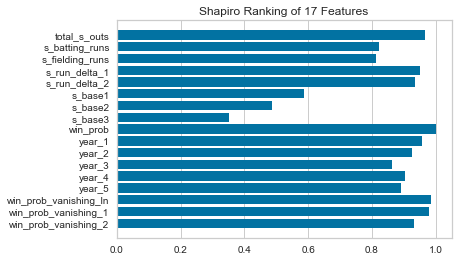

In [59]:
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

Rank2D

C:\Users\Mahkah\AppData\Roaming\Python\Python37\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


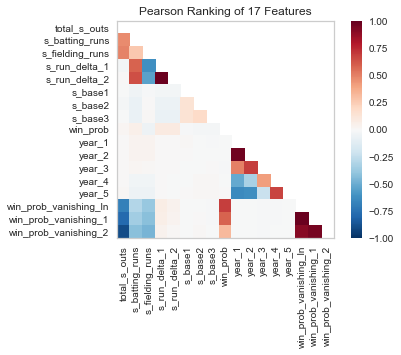

In [60]:
visualizer = Rank2D(features=features)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

Parallel Coordinates

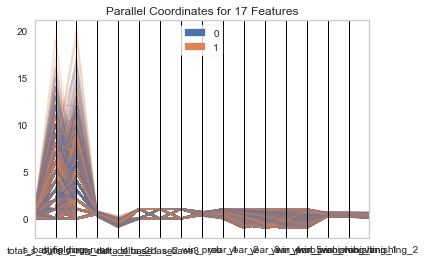

In [61]:
visualizer = ParallelCoordinates(features=features)
X_small = X.sample(5000)
visualizer.fit(X_small, y)
visualizer.transform(X_small)
visualizer.poof()

In [62]:
# visualizer = ParallelCoordinates(features=features)

# scaler = StandardScaler()
# X_standard = scaler.fit_transform(X)

# visualizer.fit(X_standard, y)
# visualizer.transform(X_standard)
# visualizer.poof()

RadViz

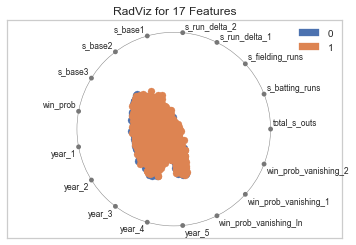

In [63]:
visualizer = RadViz(features=features)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

PCA

C:\Users\Mahkah\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mahkah\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Mahkah\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


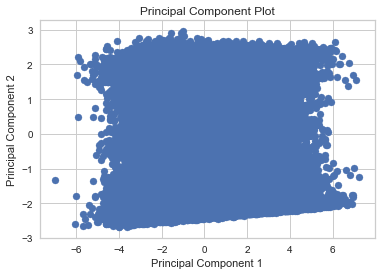

In [64]:
visualizer = PCADecomposition(features=features)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

Manifold Viz

In [65]:
# visualizer = Manifold(features=features)

# visualizer.fit(X, y)
# visualizer.transform(X)
# visualizer.poof()

Feature Importance

In [66]:
# visualizer = FeatureImportances(features=features)

# visualizer.fit(X, y)
# visualizer.transform(X)
# visualizer.poof()

Baseline Model

In [67]:
features = ['total_s_outs', 's_batting_runs', 's_fielding_runs', 's_base1', 's_base2', 's_base3']
X = df[features]
y = df['batting_team_won']

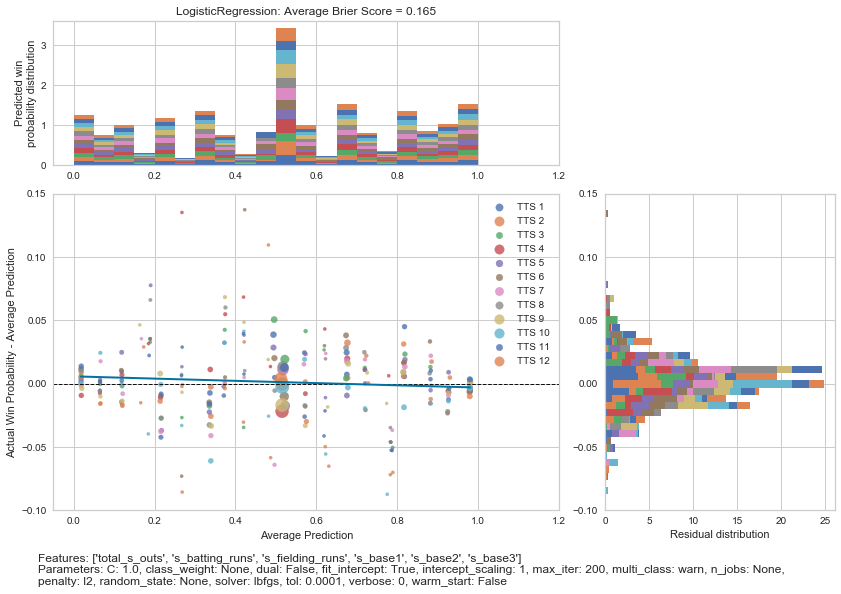

In [68]:
est = LogisticRegression(solver= 'lbfgs', max_iter=200)
filename = 'win_prob_models\\logit_baseline'

predict_win_prob(est, df[features], df['batting_team_won'], filename=filename)

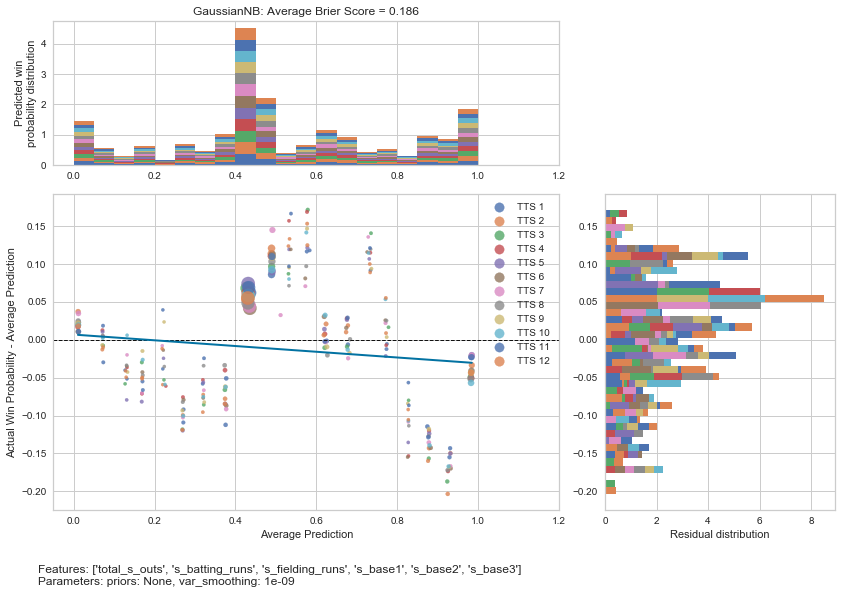

In [69]:
est = GaussianNB()
filename = 'win_prob_models\\nb_baseline'

predict_win_prob(est, df[features], df['batting_team_won'], filename=filename)


SVC computation time scales according to greater than instances squared, so we need to trim the dataset. We'll do two trimmings to validate the sampling

C:\Users\Mahkah\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\Mahkah\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

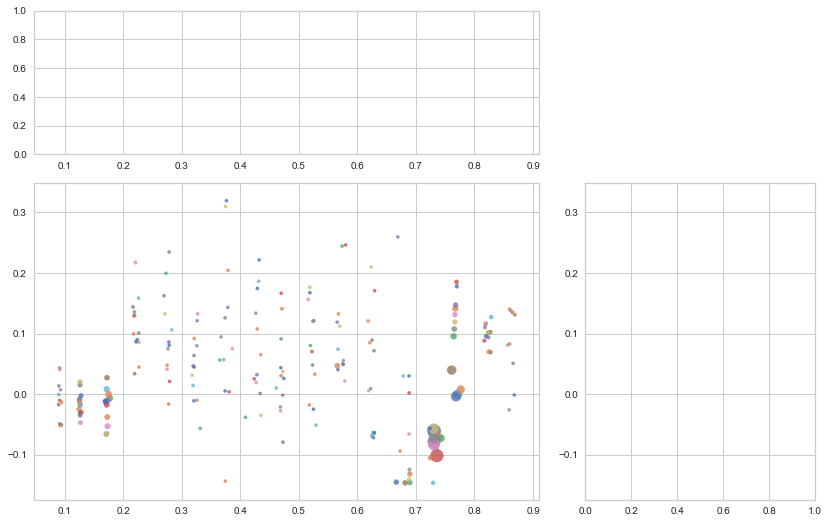

In [71]:
df_small = df.sample(10000, random_state=10)
est = SVC(gamma='scale', probability=True)
filename = 'win_prob_models\\svc_baseline1'
predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


In [ ]:
# df_small = df.sample(10000, random_state=20)
# predict_win_prob(SVC(gamma='scale', probability=True), df_small[features], df_small['batting_team_won'], filename='win_prob_models\\svc_baseline2')


Kitchen Sink

In [72]:
features = ['total_s_outs', 's_batting_runs', 's_fielding_runs', 's_run_delta_1', 's_run_delta_2', 
           's_base1', 's_base2', 's_base3', 'win_prob', 'year_1', 'year_2', 'year_3', 'year_4', 'year_5',
          'win_prob_vanishing_ln', 'win_prob_vanishing_1', 'win_prob_vanishing_2']
X = df[features]
y = df['batting_team_won']
df_small = df.sample(10000, random_state=10)


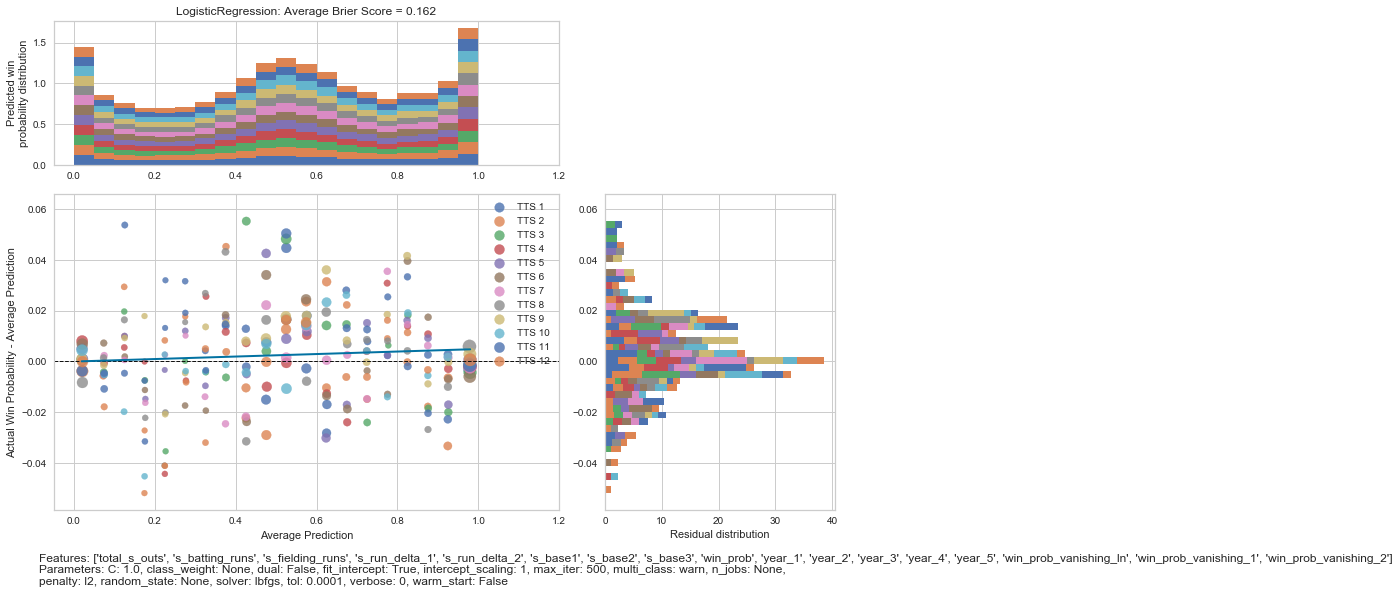

In [73]:
est = LogisticRegression(solver= 'lbfgs', max_iter=500)
filename = 'win_prob_models\\logit_default'

predict_win_prob(est, df[features], df['batting_team_won'], filename=filename)


C:\Users\Mahkah\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Mahkah\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Mahkah\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Mahkah\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


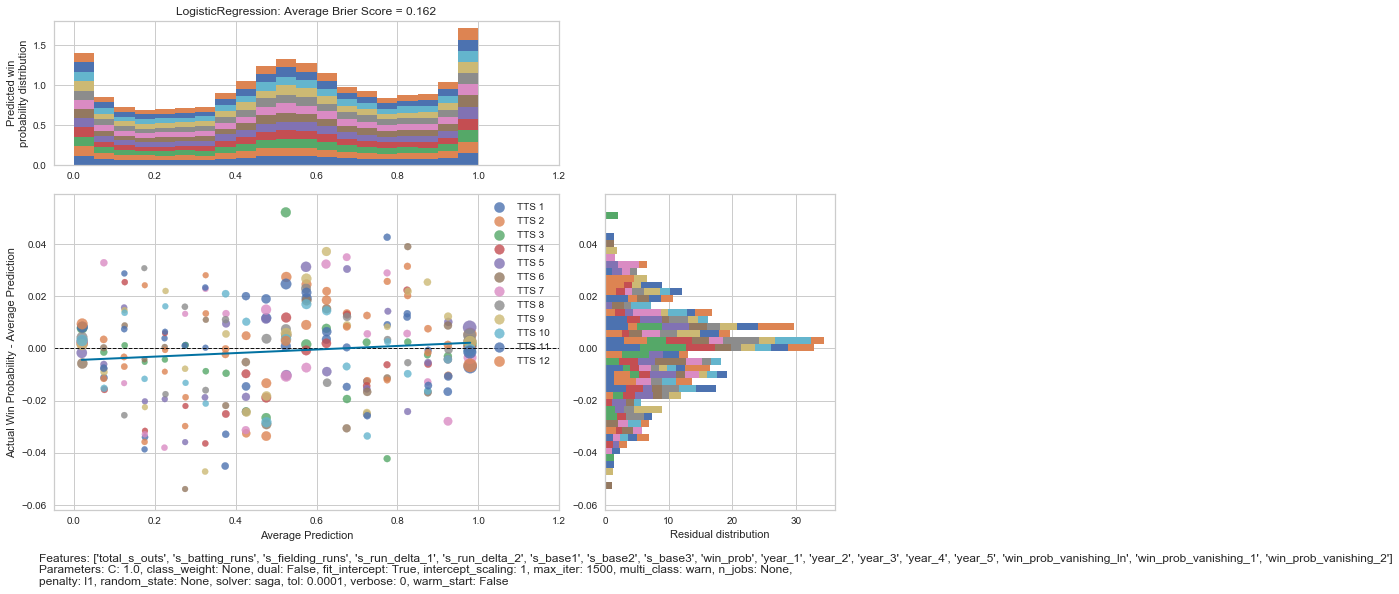

In [74]:
est = LogisticRegression(solver= 'saga', max_iter=1700, penalty='l1')
filename = 'win_prob_models\\logit_l1'

predict_win_prob(est, df[features], df['batting_team_won'], filename=filename)


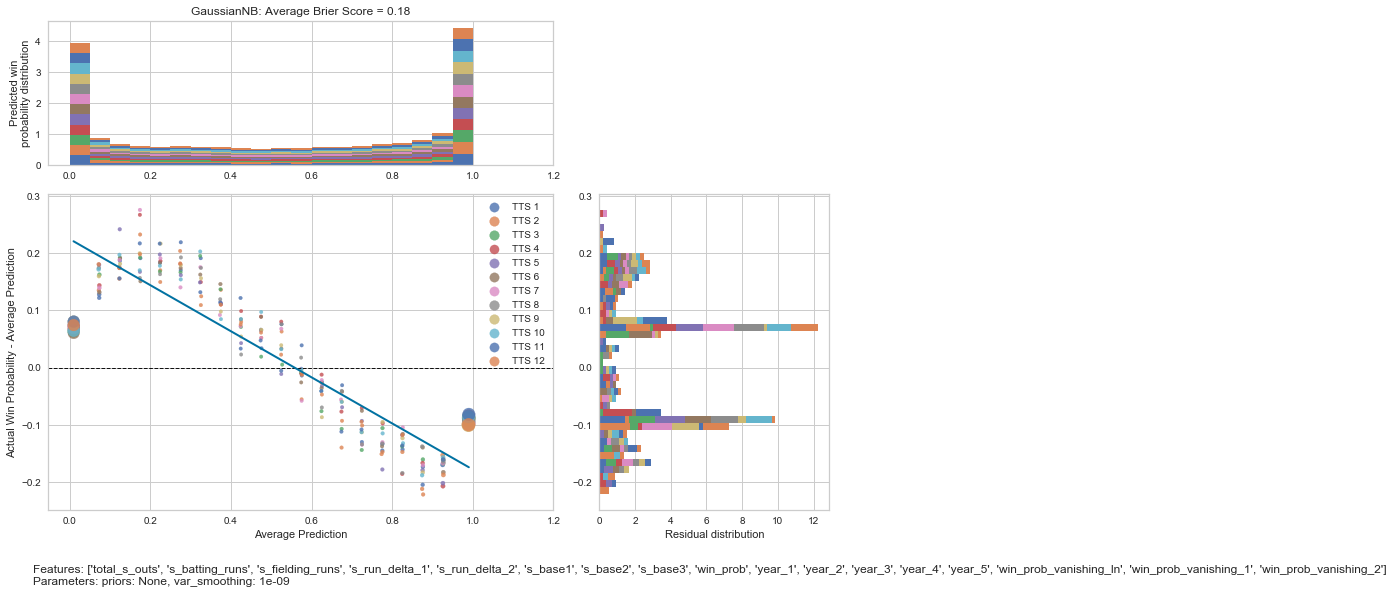

In [75]:
est = GaussianNB()
filename = 'win_prob_models\\nb_default'

predict_win_prob(est, df[features], df['batting_team_won'], filename=filename)


"Gaussian naive Bayes’ calibration curve has a transposed-sigmoid shape. This is typical for an over-confident classifier." https://scikit-learn.org/stable/modules/calibration.html#calibration

Try calibration

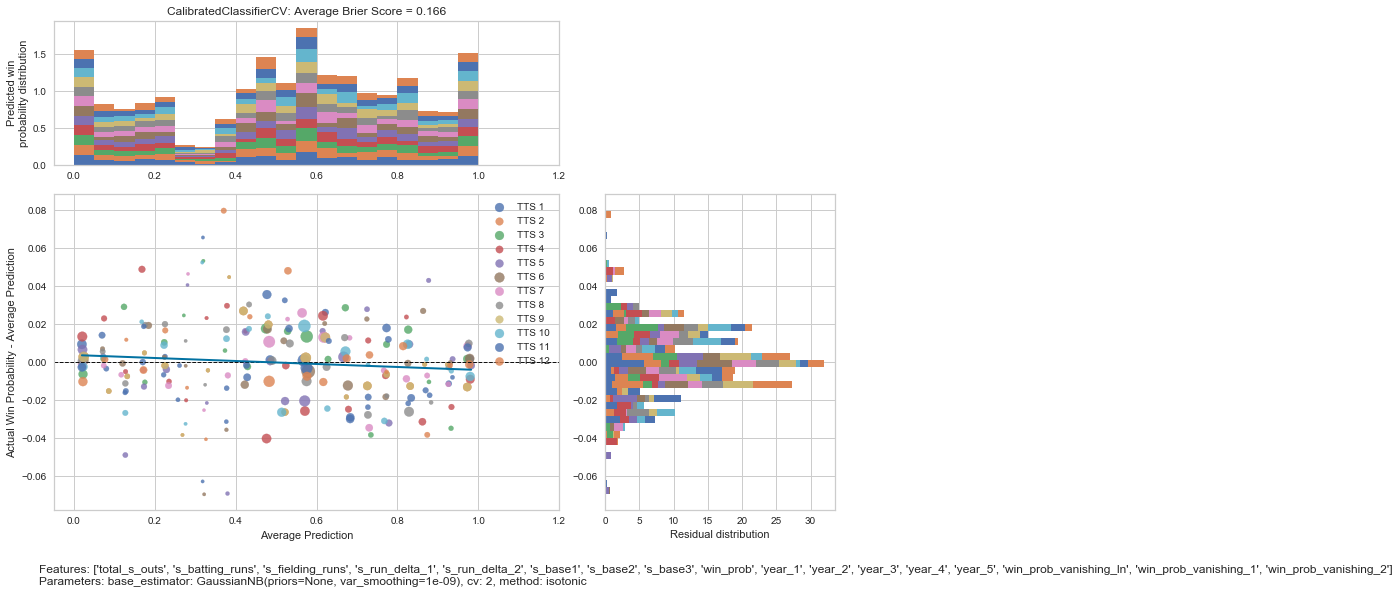

In [76]:
est =  CalibratedClassifierCV(GaussianNB(), cv=2, method='isotonic')
filename = 'win_prob_models\\nb_default_isotonic'

predict_win_prob(est , df[features], df['batting_team_won'], filename=filename)


In [77]:
# Likely has issues with creating NaNs

# est =  CalibratedClassifierCV(GaussianNB(), cv=2, method='sigmoid')
# filename = 'win_prob_models\\nb_default_sigmoid'
# predict_win_prob(est , df[features], df['batting_team_won'], filename=filename)


C:\Users\Mahkah\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\Mahkah\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\Mahkah\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mahkah\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


LinAlgError: SVD did not converge in Linear Least Squares

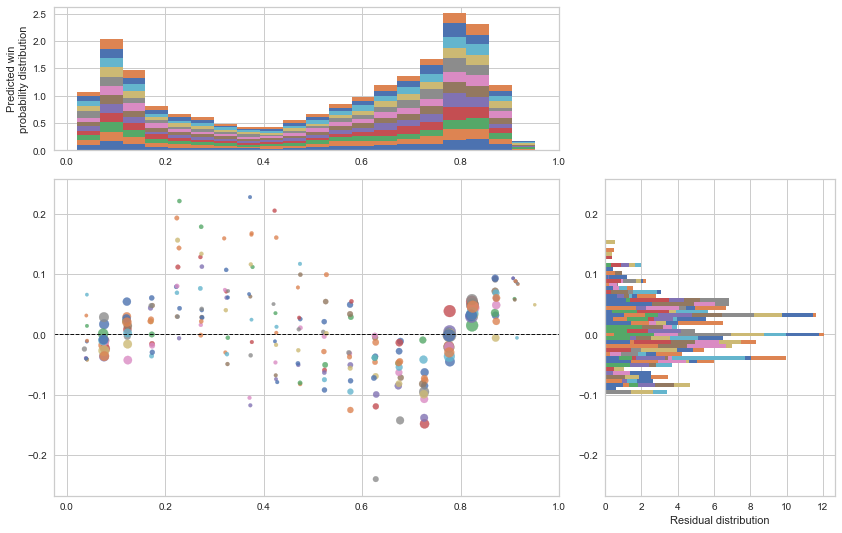

In [86]:
est = SVC(gamma='scale', probability=True)
filename = 'win_prob_models\\svc_default1'

predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


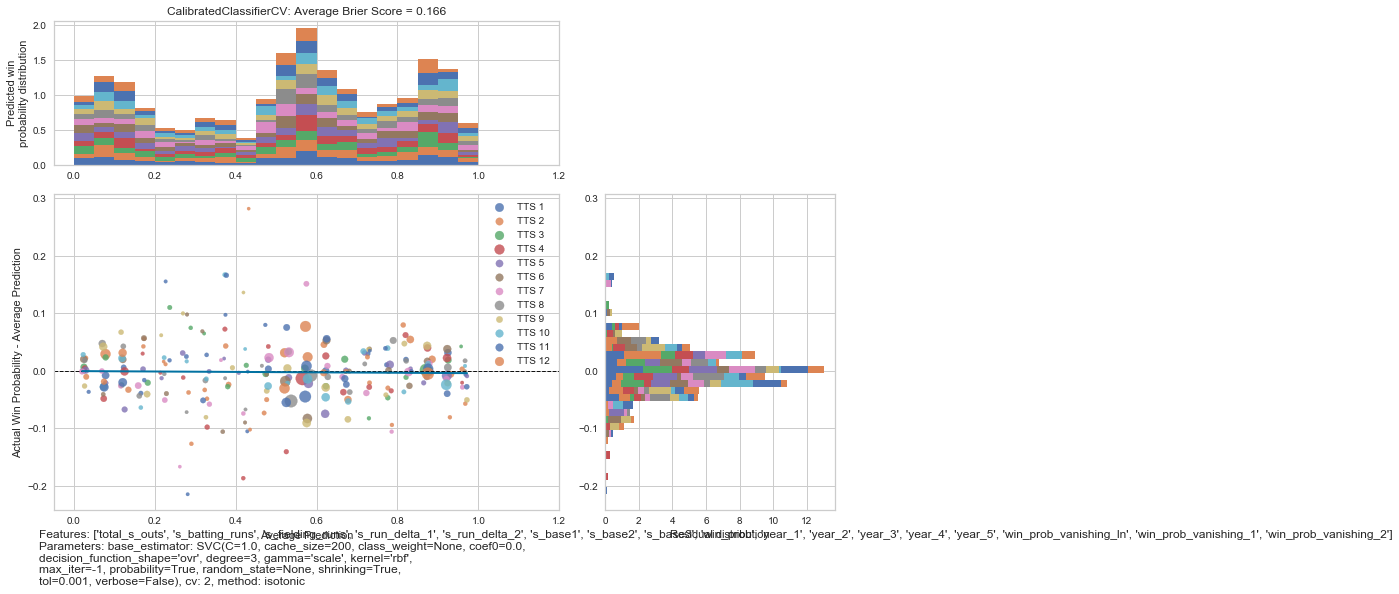

In [79]:
est =  CalibratedClassifierCV(SVC(gamma='scale', probability=True), cv=2, method='isotonic')
filename = 'win_prob_models\\svc_default_isotonic'

predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


In [ ]:
# Likely has issues with creating NaNs

# est =  CalibratedClassifierCV(SVC(gamma='scale', probability=True), cv=2, method='sigmoid')
# filename = 'win_prob_models\\svc_default_isotonic'

# predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


In [ ]:
# df_small = df.sample(10000, random_state=20)
# predict_win_prob(SVC(gamma='scale', probability=True), df_small[features], df_small['batting_team_won'], filename='win_prob_models\\svc_default2')


Hyperparameters
We'll explore these, and validate smapling if neccessary.

In [ ]:
# Likely has issues with creating NaNs

#predict_win_prob(SVC(gamma='scale', probability=True, kernel='sigmoid'), df_small[features], df_small['batting_team_won'], filename='win_prob_models\\svc_sigmoid')


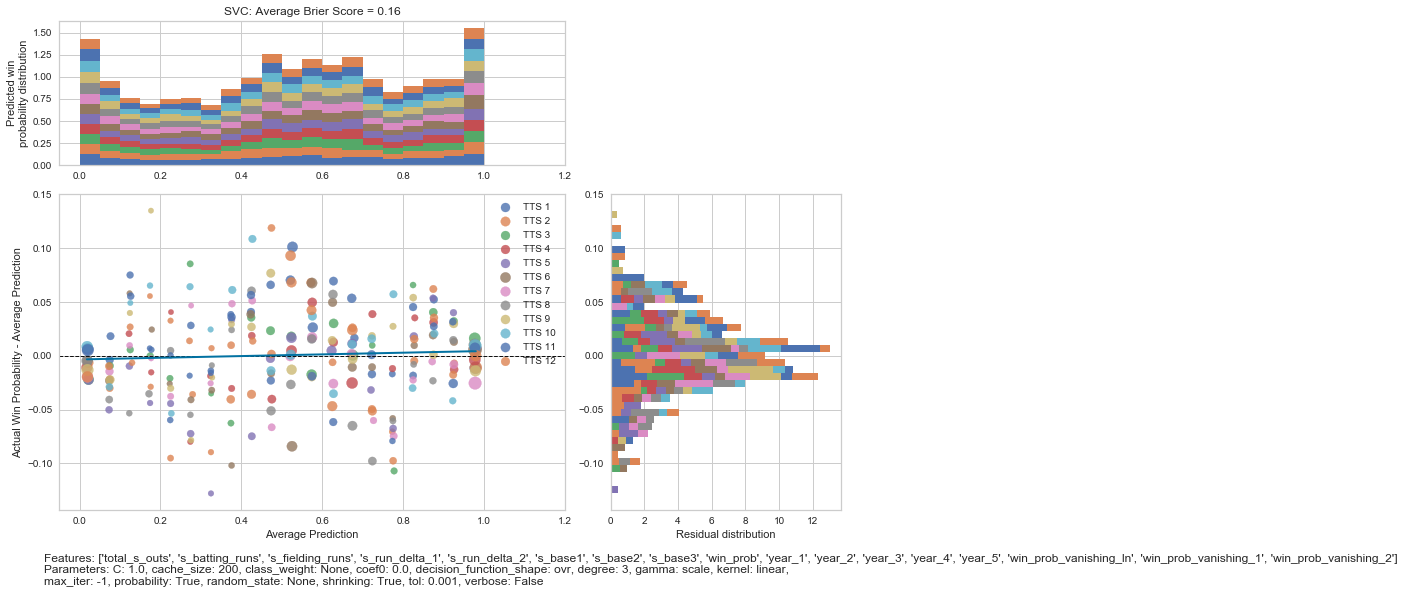

In [80]:
est = SVC(gamma='scale', probability=True, kernel='linear')
filename = 'win_prob_models\\svc_linear'

predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


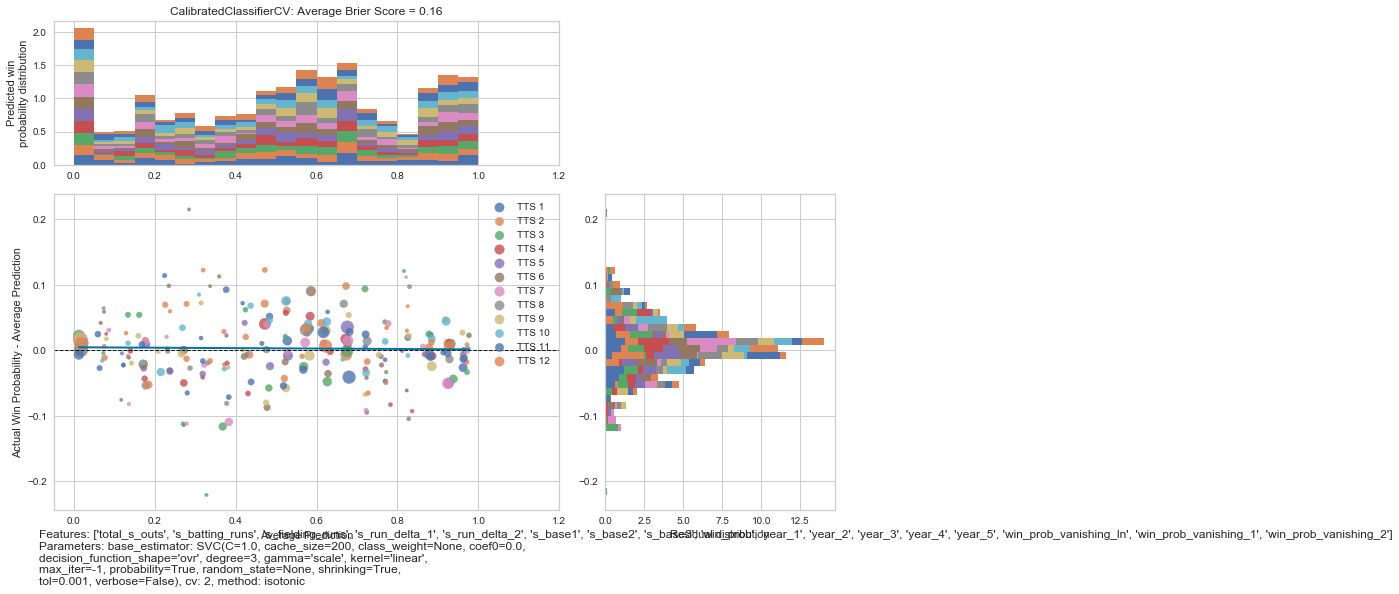

In [81]:
est =  CalibratedClassifierCV(SVC(gamma='scale', probability=True, kernel='linear'), cv=2, method='isotonic')
filename = 'win_prob_models\\svc_linear_isotonic'

predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


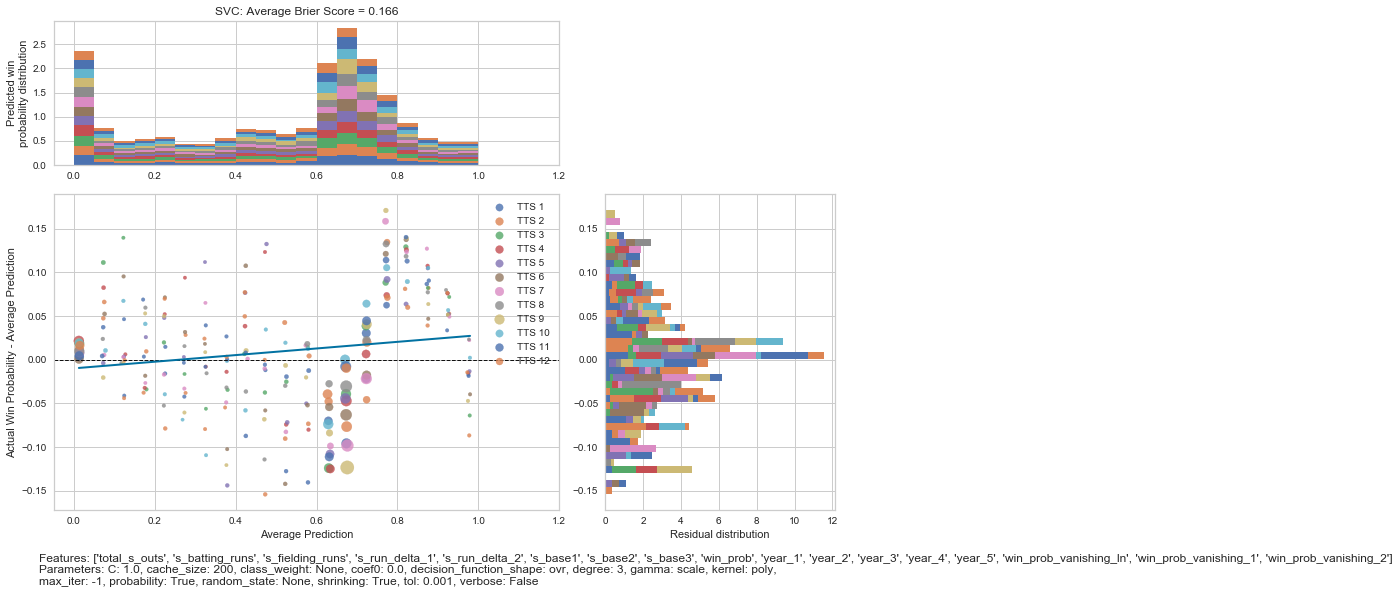

In [82]:
est = SVC(gamma='scale', probability=True, kernel='poly')
filename = 'win_prob_models\\svc_poly'

predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


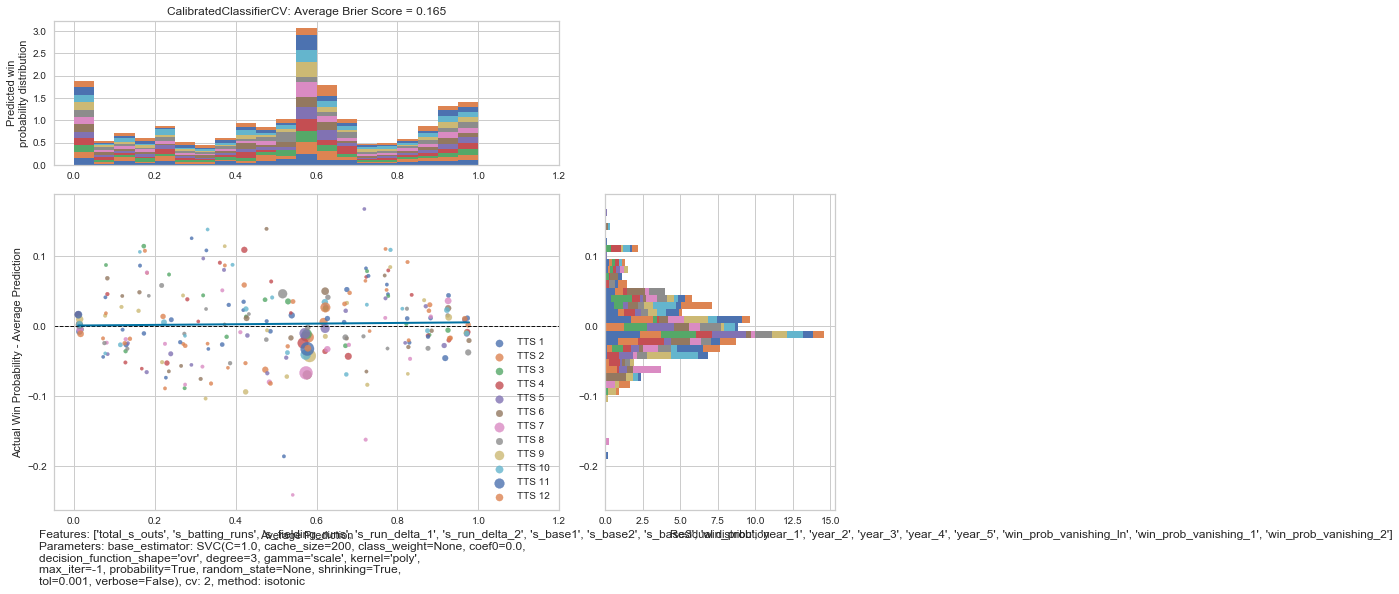

In [83]:
est =  CalibratedClassifierCV(SVC(gamma='scale', probability=True, kernel='poly'), cv=2, method='isotonic')
filename = 'win_prob_models\\svc_poly_isotonic'

predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


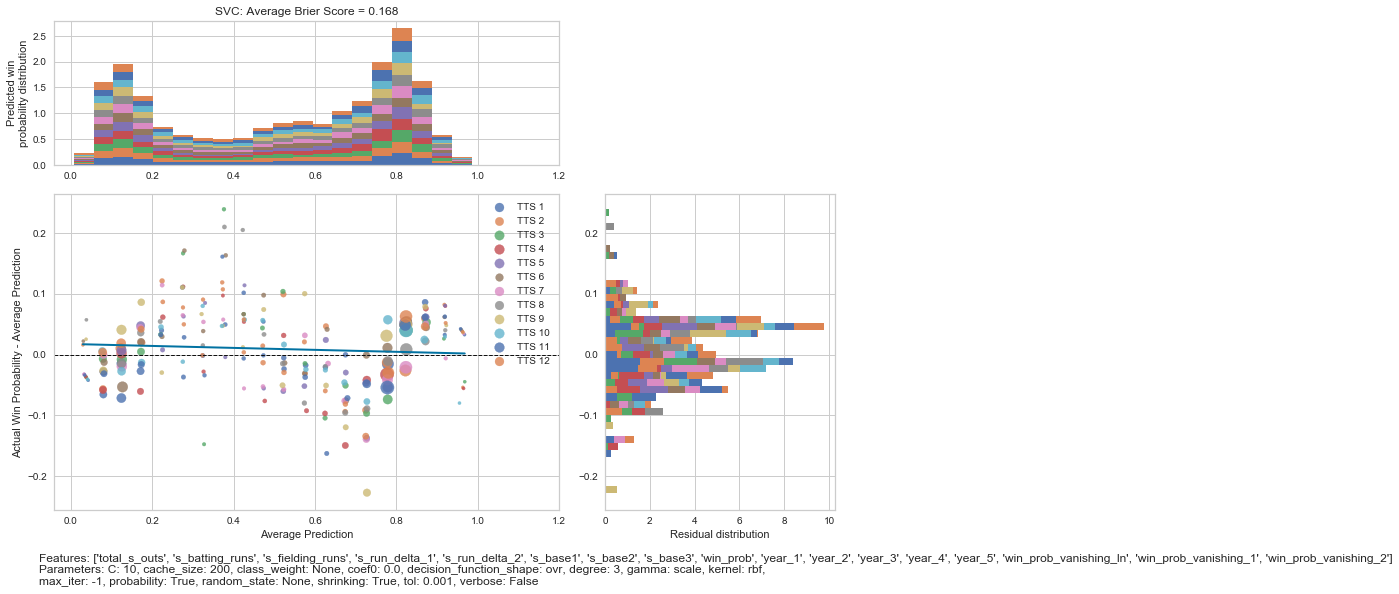

In [84]:
est = SVC(gamma='scale', probability=True, C=10)
filename = 'win_prob_models\\svc_default_c10'

predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


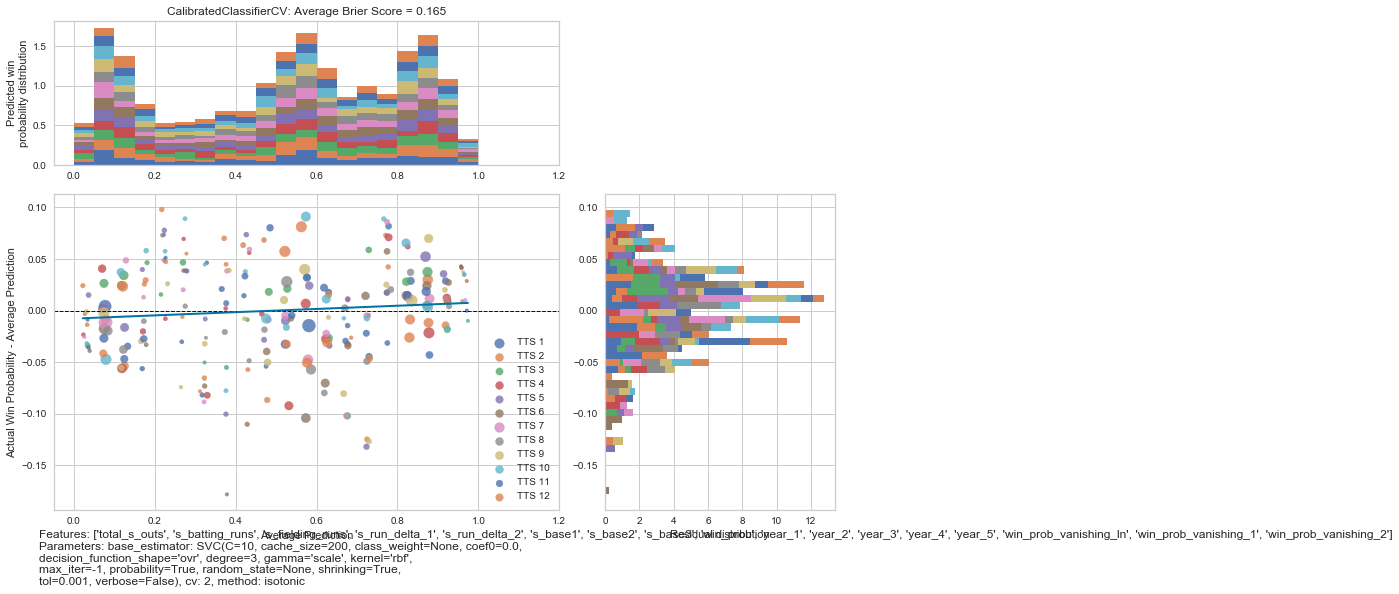

In [85]:
est =  CalibratedClassifierCV(SVC(gamma='scale', probability=True, C=10), cv=2, method='isotonic')
filename = 'win_prob_models\\svc_default_c10_isotonic'

predict_win_prob(est, df_small[features], df_small['batting_team_won'], filename=filename)


Using a linear SVC kernel seemed to work well. Let's dig in further. Just kidding, no predict_proba method

In [ ]:
#df_mid = df.sample(50000, random_state=10)

In [ ]:
# predict_win_prob(LinearSVC(), df_mid[features], df_mid['batting_team_won'], filename='win_prob_models\\Linearsvc_default')
# predict_win_prob(LinearSVC(penalty= 'l1'), df_mid[features], df_mid['batting_team_won'], filename='win_prob_models\\Linearsvc_l1')


In [ ]:
# Try using win probability as the prior 
#predict_win_prob(GaussianNB(), df[features], df['batting_team_won'], filename='win_prob_models\\nb_default')


Use grid search for hyper parameters (GridSearchCV, RandomizedSearchCV).

Cross validate (cross_val_score)